<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/whitenoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelling & Analyzing White Noise Processes

**Exploratory Data Analysis, Statistical Test & Data Transformations**

*Author: Alexander Del Toro Barba*

## What is a white noise process?

stationary bla bla

https://machinelearningmastery.com/white-noise-time-series-python/

# Import Libraries

In [2]:
# Import packages
import numpy as np
import sklearn
from decimal import *
from numpy import linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import collections
import datetime
import matplotlib
from scipy import stats
import scipy.stats as stats
import matplotlib.pylab as py
import matplotlib.pyplot as plt
from numpy import sqrt
from copy import copy
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import statsmodels
from statsmodels.tsa.stattools import adfuller
from numpy import log

# Create white noise time series

**First White Noise Process**

In [0]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(3000)]
series = Series(series)

**Second White Noise Process**

In [0]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
# seed random number generator
seed(1)
# create white noise series
series2 = [gauss(0.0, 1.0) for i in range(1000)]
series2 = Series(series2)

with alt data (NYCflights13 data)
https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

**Merge the Whote Noise Processes**

In [0]:
# granger = pd.merge(series, series2, how='inner', on='index')
# granger = pd.concat(series, series2)
# granger = granger.round(2)

# Summarize Time Series

In [5]:
series.head()

0    1.288185
1    1.449446
2    0.066336
3   -0.764544
4   -1.092173
dtype: float64

In [6]:
series.describe()

count    3000.000000
mean        0.007780
std         0.995494
min        -3.149965
25%        -0.648906
50%         0.005181
75%         0.689631
max         3.284978
dtype: float64

In [7]:
series.skew()

-0.04977536942634736

In [8]:
series.kurt()

-0.13723426818327544

In [9]:
series.quantile(0.95)

1.6407238550995906

# Visualize Time Series

## Time Series Plot

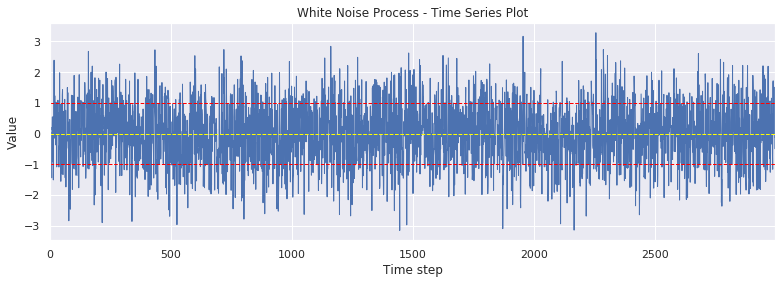

In [10]:
df = series
sns.set(rc={'figure.figsize':(13, 4)})
df.plot(linewidth=1.0,title='White Noise Process - Time Series Plot')
plt.ylabel('Value')
plt.xlabel('Time step')
plt.axhline(y=1, color='red', linestyle='--', linewidth=1.0);
plt.axhline(y=-1, color='red', linestyle='--', linewidth=1.0);
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.0);

## Distribution Plot

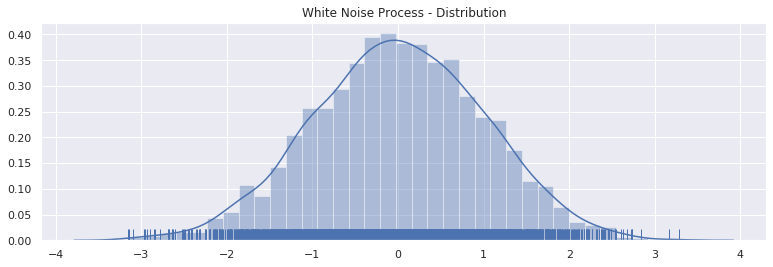

In [11]:
df = series
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('White Noise Process - Distribution')
plt.show()

## Autocorrelation Plot

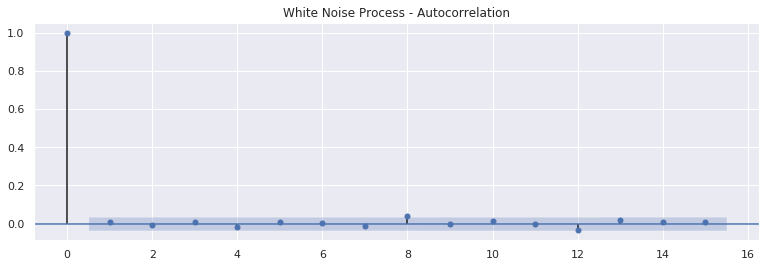

In [12]:
sns.set(rc={'figure.figsize':(13, 4)})
sm.graphics.tsa.plot_acf(series.squeeze(), lags=15)
plt.title('White Noise Process - Autocorrelation')
plt.show()

## Partial Autocorrelation Plot

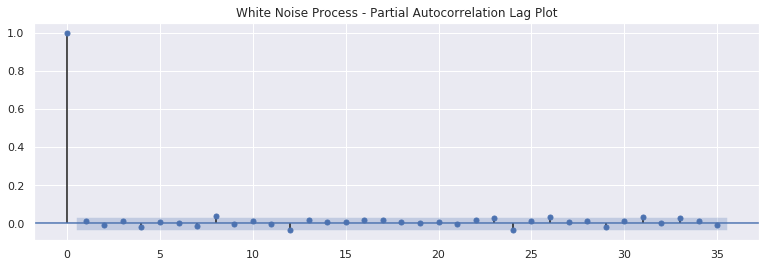

In [13]:
plot_pacf(series)
plt.title('White Noise Process - Partial Autocorrelation Lag Plot')
plt.show()

## Lag Plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


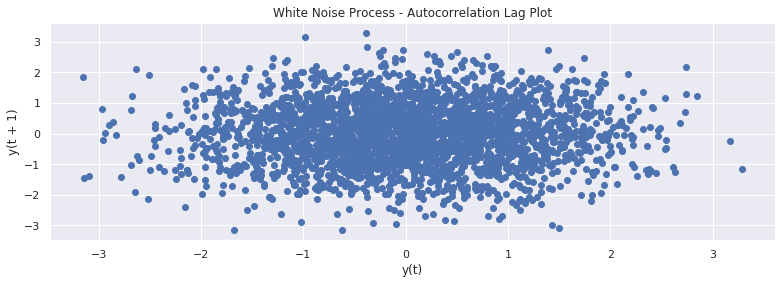

In [14]:
lag_plot(series)
plt.title('White Noise Process - Autocorrelation Lag Plot')
plt.show()

## Box Plot

Text(0.5, 1.0, 'White Noise Process - Boxplot')

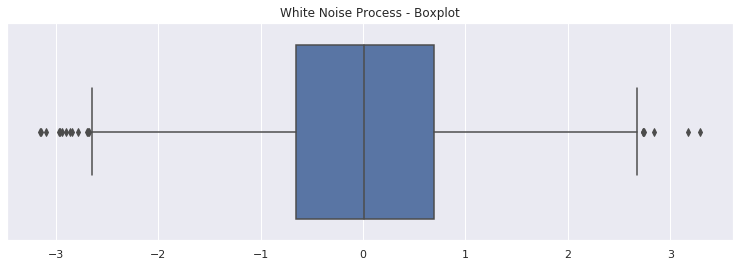

In [15]:
sns.boxplot(series).set_title('White Noise Process - Boxplot')

## QQ Plot

**Normal Distribution**

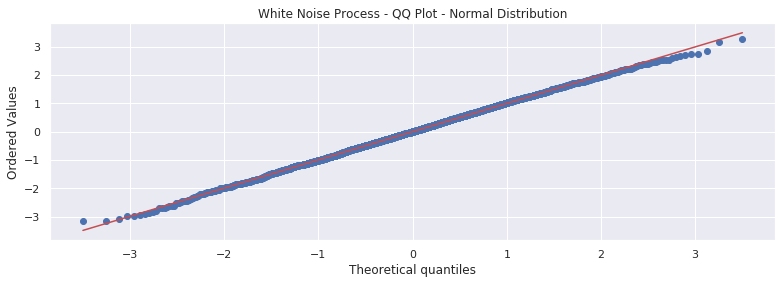

In [16]:
stats.probplot(series, dist="norm", plot=plt)
plt.title('White Noise Process - QQ Plot - Normal Distribution')
plt.show()

**QQ Plot of the residuals against quantiles of t-distribution with 4 degress of freedom**

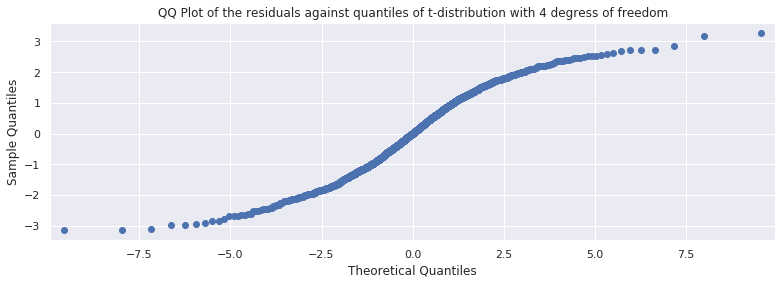

In [17]:
fig = sm.qqplot(series, stats.t, distargs=(4,))
plt.title('QQ Plot of the residuals against quantiles of t-distribution with 4 degress of freedom')
plt.show()

**QQ Plot of the residuals against quantiles of t-distribution with mean 3 and std 10**

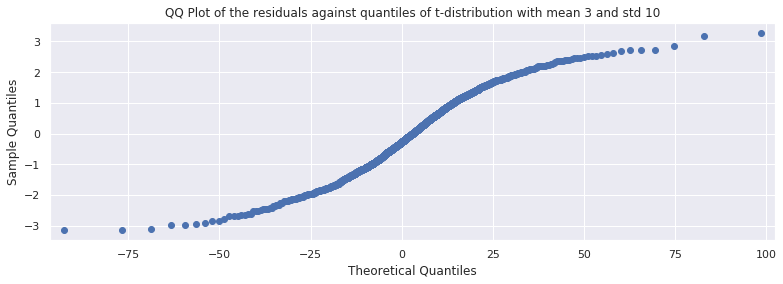

In [18]:
fig = sm.qqplot(series, stats.t, distargs=(4,), loc=3, scale=10)
plt.title('QQ Plot of the residuals against quantiles of t-distribution with mean 3 and std 10')
plt.show()

**Automatically determine parameters for t distribution including the loc and scale**

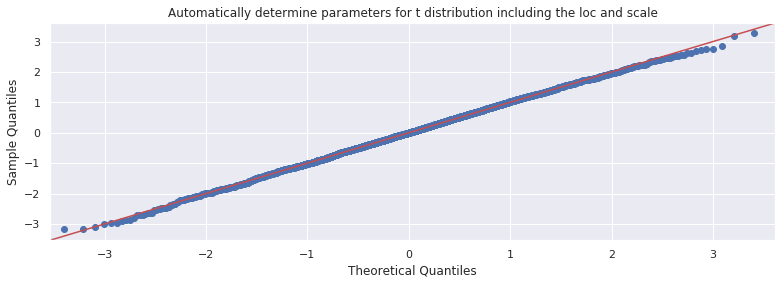

In [19]:
fig = sm.qqplot(series, stats.t, fit=True, line='45')
plt.title('Automatically determine parameters for t distribution including the loc and scale')
plt.show()

**QQ Plot - Cauchy Distribution**

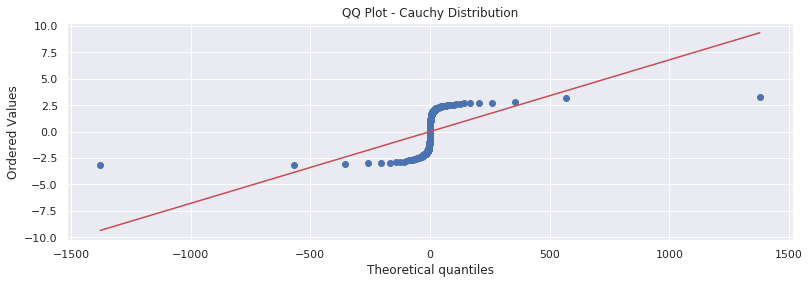

In [20]:
stats.probplot(series, dist="cauchy", plot=plt)
plt.title('QQ Plot - Cauchy Distribution')
plt.show()

**QQ Plot - Levy Distribution**

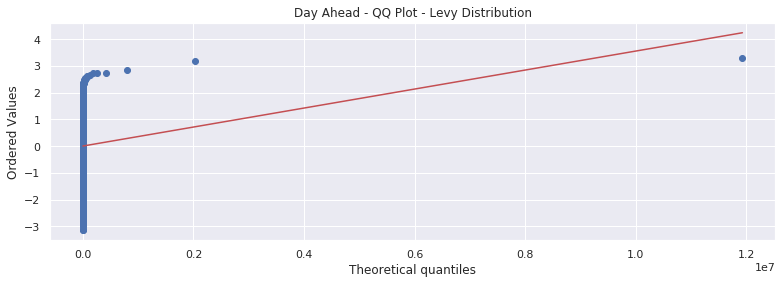

In [21]:
stats.probplot(series, dist="levy", plot=plt)
plt.title('Day Ahead - QQ Plot - Levy Distribution')
plt.show()

# Statistical Tests

## Johansen Test for Cointegration

In [0]:
# Johansen Test for Cointegration on Original Time 
# uses the augmented Engle-Granger two-step cointegration test
# Test for no-cointegration of a univariate equation. The null hypothesis is no cointegration.
# If two time series, X and Y, are cointegrated, there must exist Granger causality either from X to Y, or from Y to X, both in both directions. 
# The presence of Granger causality in either or both directions between X and Y does not necessarily imply that the series will be cointegrated.
# first value is cointegration score, second is p-value, rest is 1%, 5% and 10%.
statsmodels.tsa.stattools.coint(series, series2, trend='ct', method='aeg', autolag='aic')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


(-inf, 0.0, array([-4.3431099 , -3.79010222, -3.50340612]))

## BDS test statistic for independence

In [0]:
# BDS test statistic for independence of a time series
# Time Series is IID (= Null Hypothesis)
statsmodels.tsa.stattools.bds(series, max_dim=2, epsilon=None, distance=1.5)

(array(-1.61871806), array(0.10550794))

## KPSS for stationarity

* Kwiatkowski-Phillips-Schmidt-Shin to test if time series is stationarity. Computes the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for the null hypothesis that x is level or trend stationary. Stationarity Test: KPSS
* H0: Series has no unit root (is stationary or a deterministic trend). Ha: Series is not stationary
* Reject H0 if  p-value of less than 5% and test stats higher than provided critical values

**Cautions**

* A major disadvantage for the KPSS test is that it has a high rate of Type I errors (it tends to reject the null hypothesis too often). If attempts are made to control these errors (by having larger p-values), then that negatively impacts the test’s power.

* One way to deal with the potential for high Type I errors is to combine the KPSS with an ADF test. If the result from both tests suggests that the time series in stationary, then it probably is.

* https://www.statisticshowto.datasciencecentral.com/kpss-test/

**KPSS - Level Stationarity Test**

H0 = Stationary (Stochastic Trend). H1 = Non-Stationary (Unit Root)

In [57]:
statsmodels.tsa.stattools.kpss(series, regression='c', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.07356701300567194,
 0.1,
 29,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

Test statistics at 0.07 is not more extreme than the provided critical value of 0.46 for 5%. p-value is not below 0.05. Do not reject H0. Process is stationary.


**KPSS - Trend Stationarity Test**

H0 = Deterministic Trend. H1 = Non-Stationary (Unit Root)

In [58]:
statsmodels.tsa.stattools.kpss(series, regression='ct', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.07262329049393641,
 0.1,
 29,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

Test statistics at 0.088 is smaller than provided critical value of 0.146. p-value is at 0.1 (“not significant”). Do not reject H0.

Summary: Both test show no unit root. Time series is either trend or level stationary.

## Augmented Dickey Fuller

In [59]:
# Unit Root Test: Augmented Dickey Fuller
# Null hypothesis: unit root (non stationary)
# H0: There is a unit root for the series (non stationary)
# Ha: There is no unit root for the series. The series is stationary.
# Reject H0 if p-value of less than 5% and test stats higher than provided critical values
X = series
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -54.201163
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Reject the null hypothesis as the value of the test statistic is more extreme than the 5% value (-31.648359 > -2.864). Also p-value is at 0.0 below 0.05 threshold. Time series is stationary.

## Zivot-Andrews structural-break unit-root test.

H0 = unit root with a single structural break

In [0]:
statsmodels.tsa.stattools.zivot_andrews(series, regression='c', autolag='aic')

## Ljung-Box Q Statistic

In [0]:
# Ljung-Box Q Statistic
# Returns Ljung-Box Q-statistic for autocorrelation parameters and p-value
# examining the null hypothesis of independence in a given time series. These are sometimes known as ‘portmanteau’ tests.
statsmodels.tsa.stattools.q_stat(series, nobs=1000, type='ljungbox')

## Kolmogorov-Smirnov Test

In [15]:
# Kolmogorov-Smirnov Test
stats.kstest(series, 'norm')

KstestResult(statistic=0.015800131246919452, pvalue=0.9641724645882203)

## Jarque-Bera Test

compares sample skewness and kurtosis to 0 and 3, their values under normality.

The Jarque-Bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.
Note that this test only works for a large enough number of data samples (>2000) as the test statistic asymptotically has a Chi-squared distribution with 2 degrees of freedom.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html

Null hypothesis: sample is normal distributed. JB(PValue<0.05)= Reject Ho (Non-Normal Distribution)

In [18]:
stats.jarque_bera(series)

(3.0954202595725233, 0.2127345510266394)

## Anderson-Darling Test

Anderson Darling tests whether the sample from the population follows a particular distribution (default: normal).

In [17]:
stats.anderson(series)

AndersonResult(statistic=0.3630757720836755, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

## Granger Causality

Granger causality means that past values of x2 have a statistically significant effect on the current value of x1, taking past values of x1 into account as regressors. 

* **Null hypothesis: x2 does NOT Granger cause x1**
* **Reject null hypothesis if the p-values are below a desired size of the test**

The null hypothesis for all four test is that the coefficients corresponding to past values of the second time series are zero.

* If p > .10 → “not significant” 
* If p ≤ .10 → “marginally significant” 
* If p ≤ .05 → “significant” 
* If p ≤ .01 → “highly significant.”

Explanation: With a large number of variables and lags (large number of lags may be assumed for this time series), the F-test can lose power. An alternative is the chi-square test, constructed with likelihood ratio or Wald tests. [nb: Although both versions give practically the same result, the F-test is much easier to run.] All values are computed automatically.

In [0]:
# Granger Causality
statsmodels.tsa.stattools.grangercausalitytests(master, maxlag = 10, addconst=True, verbose=True)

# Transformations

## Percentage Differenced

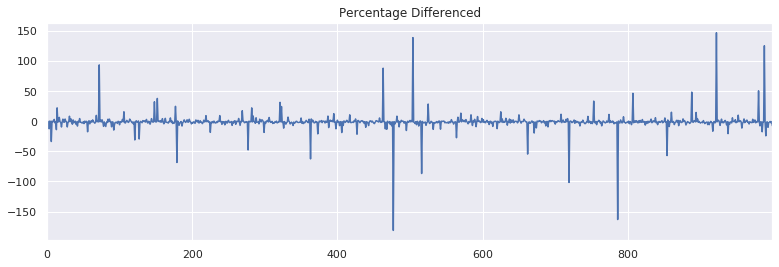

In [0]:
# Percentage Differenced
df = series / series.shift(1) -1
df.plot(title='Percentage Differenced')

## Differenced

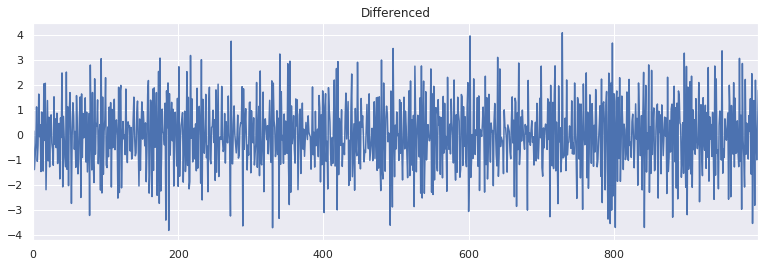

In [23]:
# Differenced
differenced = series - series.shift(1)
differenced.plot(title='Differenced')

## Square Root

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


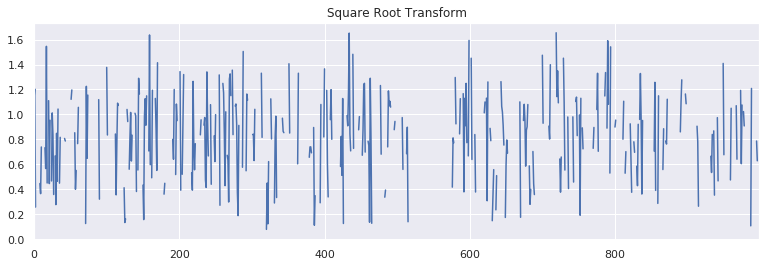

In [25]:
# Square Root Transform
sr = np.sqrt(series)
sr.plot(title='Square Root Transform')

## Log Return

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


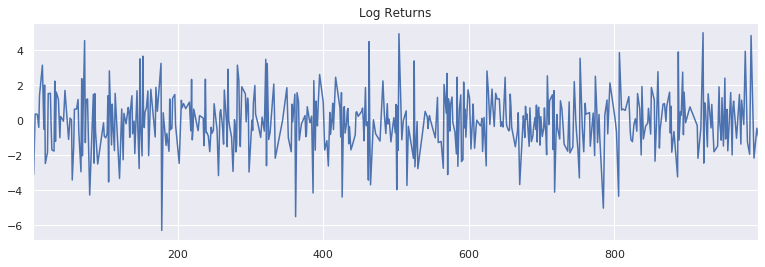

In [27]:
# Log Return
lr = np.log(series/series.shift(1)).dropna()
lr.plot(title='Log Returns')

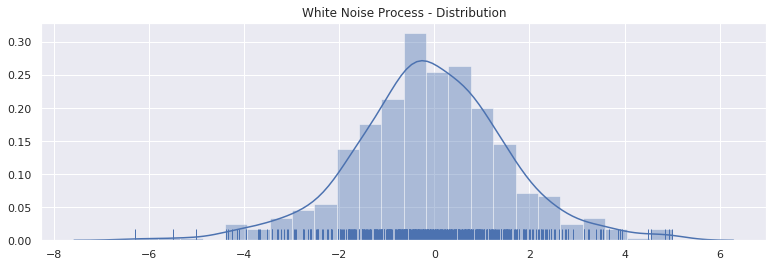

In [31]:
df = lr
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('White Noise Process - Distribution')
plt.show()

## First Derivative

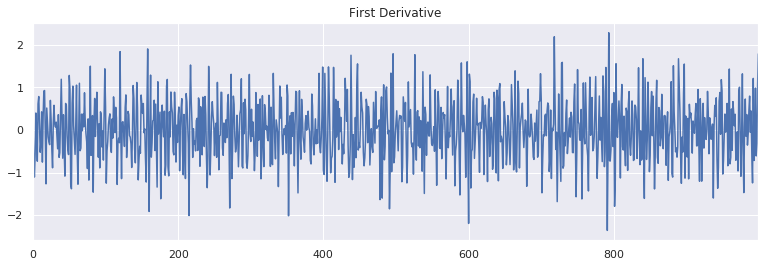

In [28]:
# First Derivative
fd = pd.Series(np.gradient(series), series.index, name='slope')
fd.plot(title='First Derivative')

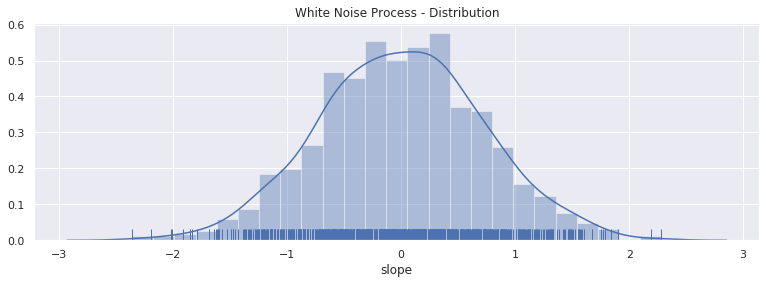

In [32]:
df = fd
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('White Noise Process - Distribution')
plt.show()